**Astroinformatica I (Semester 1 2025)**
# Tutorial Session 6: Python Data Exploration & Visualization

*N. Hernitschek*


---
## Contents
* [Python Review](#first-bullet)
* [Getting started with matplotlib](#second-bullet)
* [The matplotlib object-oriented API](#third-bullet)
* [Other 2d plot styles](#fourth-bullet)
* [3D Plots](#fifth-bullet)
* [Summary](#nineth-bullet)


## 1. Python Review <a class="anchor" id="first-bullet"></a>

Before we continue with specific coding exercises, please review the code examples we saw in the lecture and try some of your own.

Reviewing code examples should include:
* running the code
* modifying the code to get a general understanding
* trying to understand possible limitations of the code

This will help you to get a better understanding of the Python syntax as well as of specific libraries.


## 2. Getting started with matplotlib <a class="anchor" id="second-bullet"></a>

We have already seen how to use Python for data exploration and while doing so produced some plots. Those plots were mostly made "on-the-fly" while exploring our data.
To produce publication-ready (or presentation-ready) scientific plots, however, we need to make nice, specific plots. Instead of trusting matplotlib's default plotting tools to create a plot, we are going to customize our plots.

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

*    well documented
*    supports LaTeX-formatted labels and texts
*    allows for great control of every element in a figure, including figure size and DPI
*    enables high-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF
*    fully integration with the Python enviroment allows for batch-generating figures within your program
  
  

More information at the Matplotlib web page: http://matplotlib.org/


To get started, import the `matplotlib.pyplot` module under the name `plt`:




In [3]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np


We start with plotting a simple figure:
    


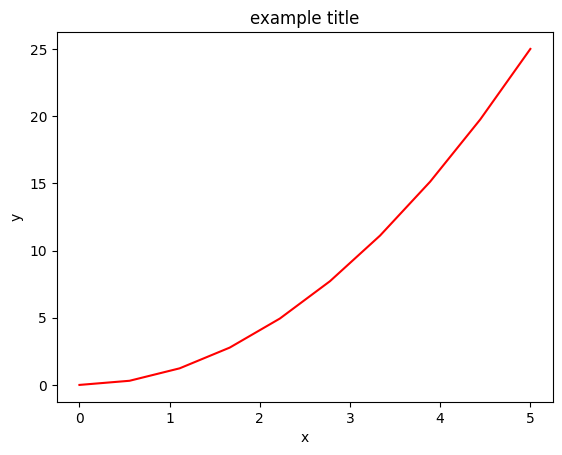

In [11]:
x = np.linspace(0, 5, 10)
y = x ** 2

plt.figure()
plt.plot(x, y, 'r')  #'b', 'k', 'r--', 'r.-'
plt.xlabel('x')
plt.ylabel('y')
plt.title('example title')
plt.show()


## 3. The matplotlib object-oriented API <a class="anchor" id="third-bullet"></a>



The main idea of object-oriented programming is to have objects that one can apply functions and actions on. The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot.

To use the object-oriented API we start very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method:



Text(0.5, 1.0, 'example title')

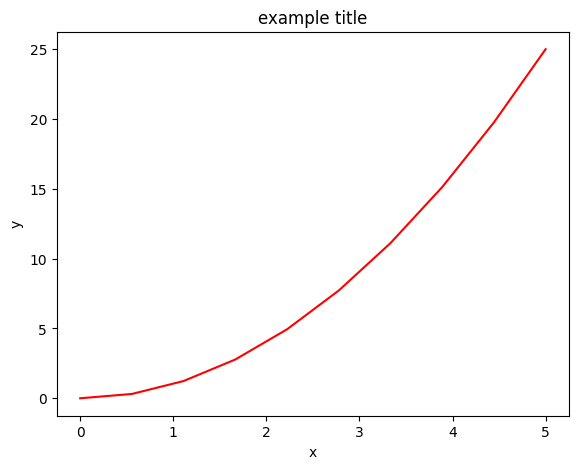

In [14]:
x = np.linspace(0, 5, 10)
y = x ** 2


fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('example title')


The above means that a bit more code is involved, but we have the advantae of now having full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

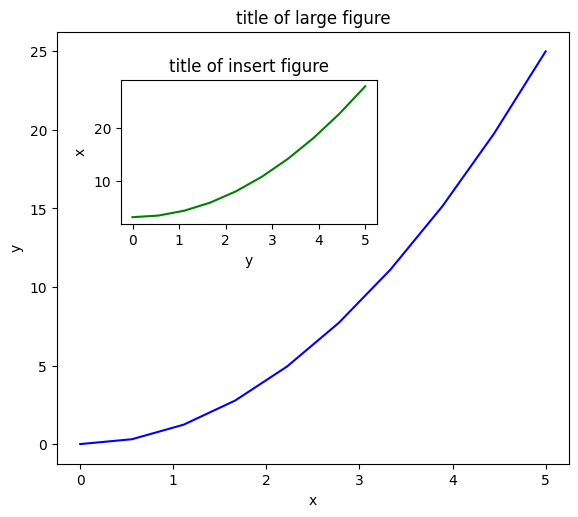

In [28]:


fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.9]) # main axes
axes2 = fig.add_axes([0.2, 0.6, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'b')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title of large figure')

# insert
axes2.plot(x, y+3, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('title of insert figure');



We can now add subplots next to each other:

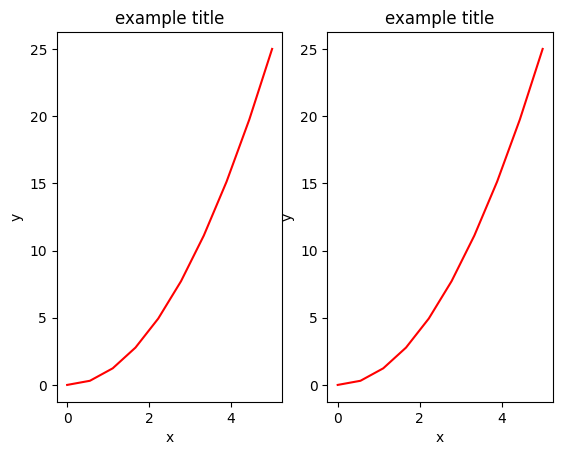

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('example title')

In the above example, figure axes and labels tend to overlap.

We can prevent this by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:


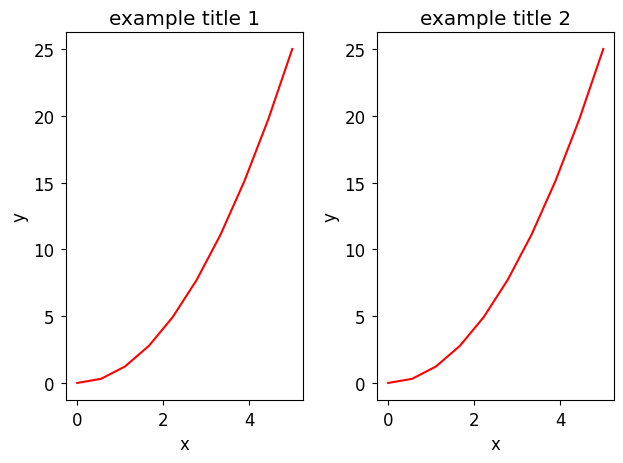

In [65]:


fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
axes[0].set_title('example title 1')    
axes[1].set_title('example title 2')    
fig.tight_layout()



### Figure size, aspect ratio and DPI

Matplotlib allows to specify the aspect ratio, DPI and figure size when the Figure object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do:


In [11]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>



The same arguments can also be passed to layout managers, such as the subplots function:


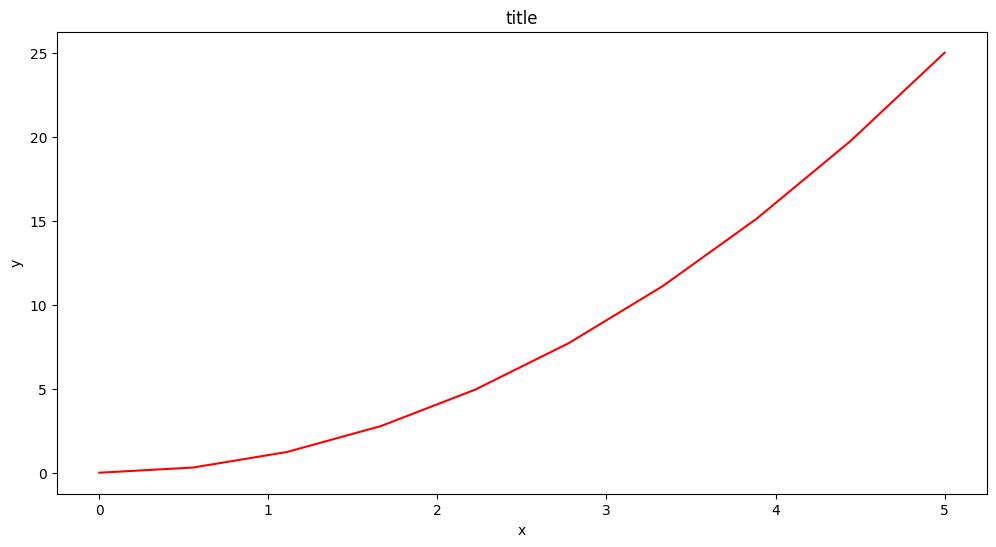

In [36]:
fig, axes = plt.subplots(figsize=(12,6))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');


### Saving figures

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 
To save a figure to a file we can use the savefig method in the Figure class:

`fig.savefig("images/filename.png")`

Here we can also optionally specify the DPI and choose between different output formats:

`fig.savefig("/home/usr/test/myimg/filename.png", dpi=200)`


For scientific papers, I recommend using PDF whenever possible as those are in a scaleable vector format. (LaTeX documents compiled with pdflatex can include PDFs using the `includegraphics` command). 


### Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the `axes` instance:


In [13]:
ax.set_title("title")

Text(0.5, 1.0, 'title')

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:


In [ ]:
ax.set_xlabel("x")
ax.set_ylabel("y")

**Legends**

To add a legend, use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure:


In [37]:

ax.plot(x, x**2, label="function A")
ax.plot(x, x**3, label="function B")
ax.legend()

The `legend` function takes an optional keyword argument (kwarg) `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some of the most common `loc` values are:



In [67]:

ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner






The following figure shows how to use the figure title, axis labels and legends described above:


Text(0.5, 1.0, 'title')

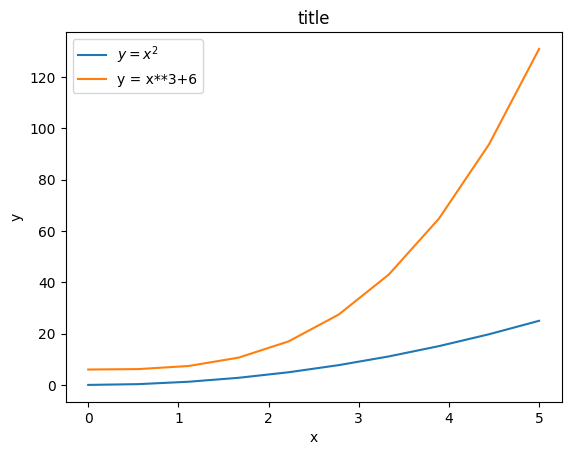

In [40]:

fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = x^2$")
ax.plot(x, x**3+6, label="y = x**3+6")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')



### Formatting text: LaTeX, fontsize, font family


Despite the figure above is functional, it does not satisfy the criteria for a publication-ready figure. First and foremost, we need to have LaTeX formatted text, and second, we need to be able to adjust the font size to appear right in a publication.

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.
To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an `'r'`, like `r"\alpha"` instead of `"\alpha"`. See the following example:

Text(0.5, 1.0, 'title')

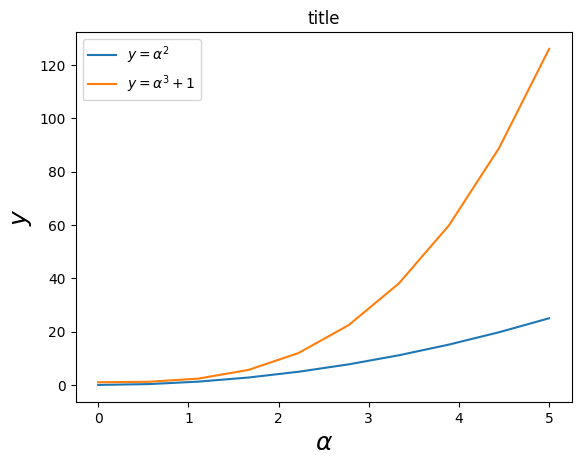

In [43]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3+1, label=r"$y = \alpha^3+1$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title')



We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):


Text(0.5, 1.0, 'title')

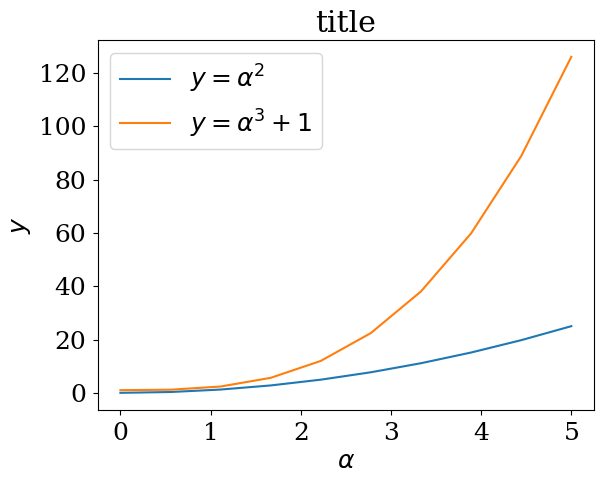

In [72]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3+1, label=r"$y = \alpha^3+1$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title')




Alternatively, we can request that matplotlib uses the system LaTeX to render the text elements in the figure. This gives usually better results (but is a bit slower):


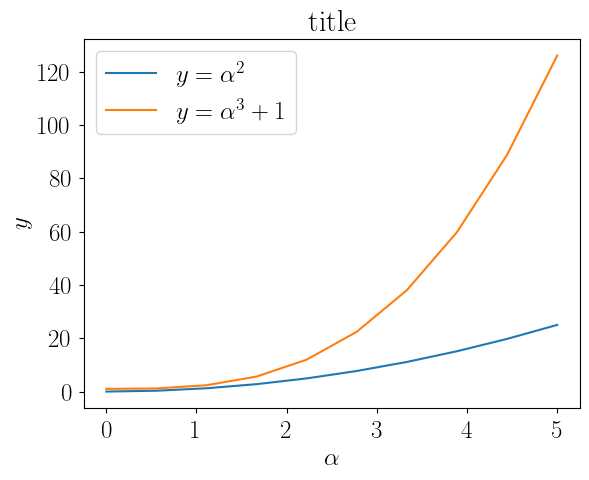

In [73]:

matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3+1, label=r"$y = \alpha^3+1$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### Change figure size to make font larger

Instead of changing the font size, we can also make the overall figure smaller (for publication purposes), and then save a pdf file (or some scaleable vector format) or use high resolution bitmap formats:


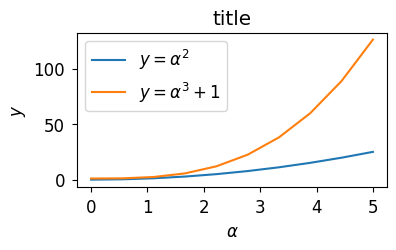

In [74]:
fig, ax = plt.subplots(figsize=(4,2))

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3+1, label=r"$y = \alpha^3+1$")
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title')
ax.legend(loc=2) # upper left corner


### Setting colors, linewidths, linetypes

**Colors**

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use an abbreviated syntax where `'b'` means blue, `'g'` means green, etc. This also supports abbreviations for the line style:



In [ ]:
# short line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

Another way to define colors is by their names or RGB codes. In addition, we can optionally provide an alpha value using the `color` and `alpha` keyword arguments:


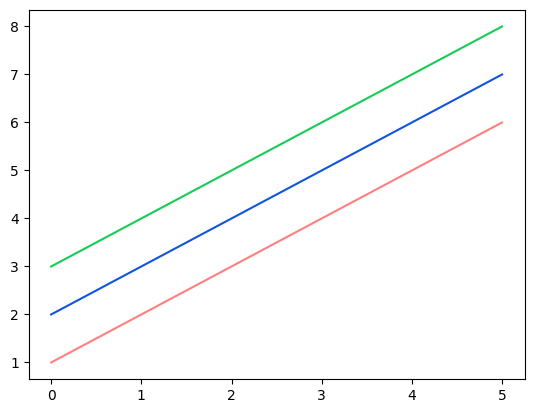

In [47]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color


**Line and marker styles**

To change the line width, we can use the linewidth or lw keyword argument. The line style can be selected using the linestyle or ls keyword arguments:


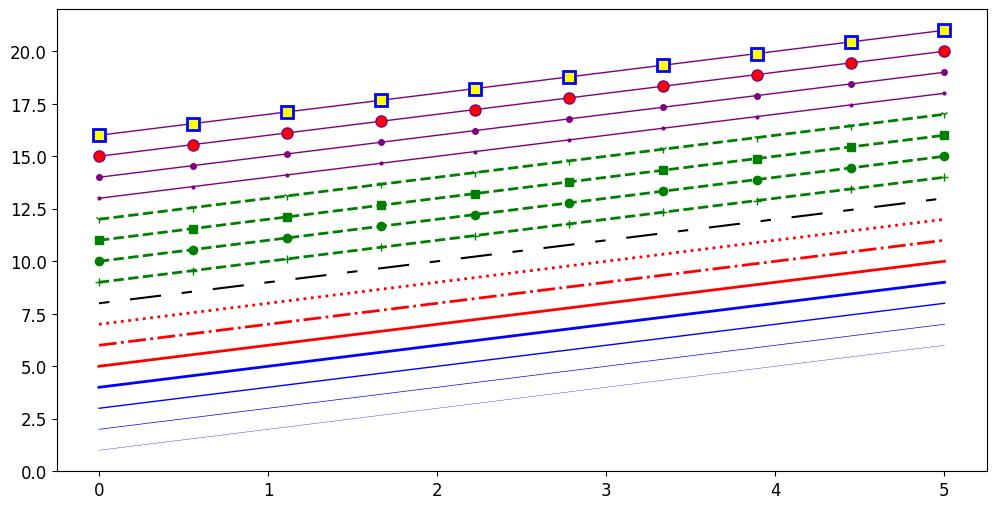

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue")


### Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

**Plot range**

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_xlim` and `set_ylim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges:


[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]


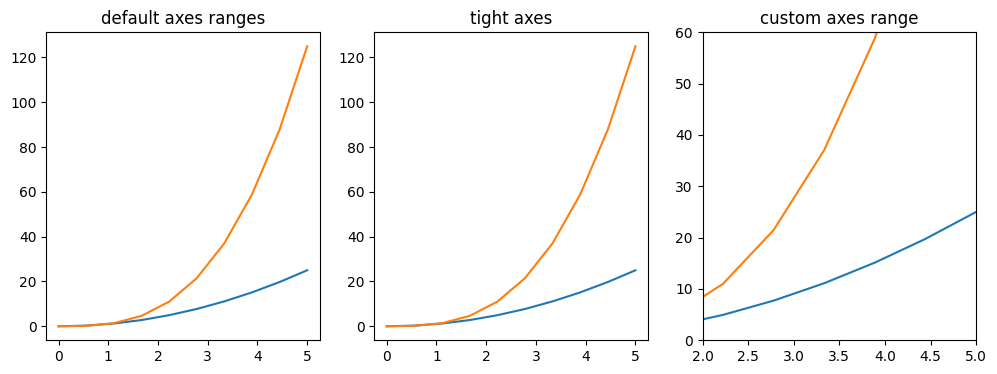

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

#print(x)

**Logarithmic scale**

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using set_xscale and set_yscale methods which accept one parameter (with the value `"log"` in this case):


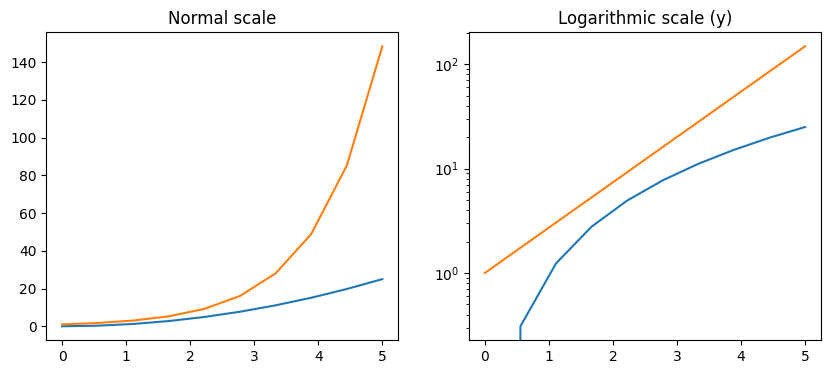

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
#xes[1].set_xscale("log")

axes[1].set_title("Logarithmic scale (y)");



**Placement of ticks and custom tick labels**

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. 
In some cases, you may want to specify which tick locations should be shown. For this, we can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:


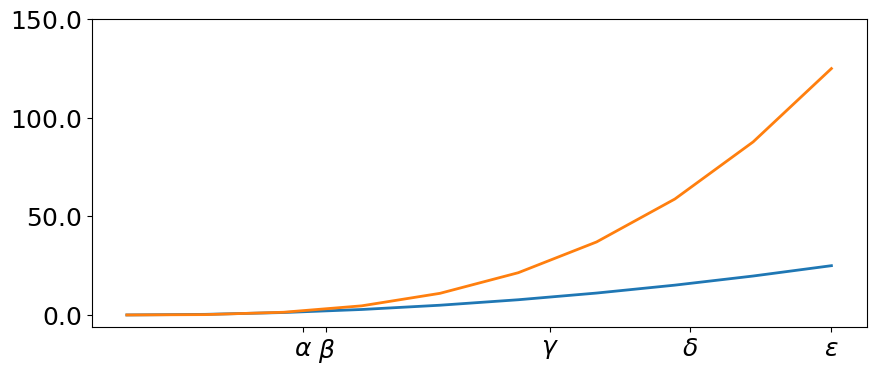

In [57]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1.25, np.sqrt(2), 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels





There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.


**Scientific notation**

With large numbers on axes, it is often better use scientific notation:


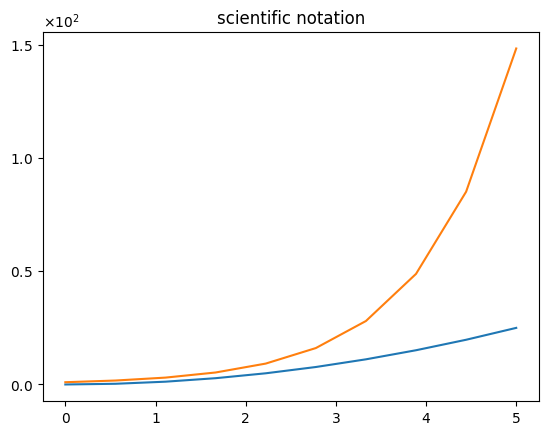

In [59]:


fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 



**Axis number and axis label spacing**

Finer adjustments include changing the spacing of various plot elements.

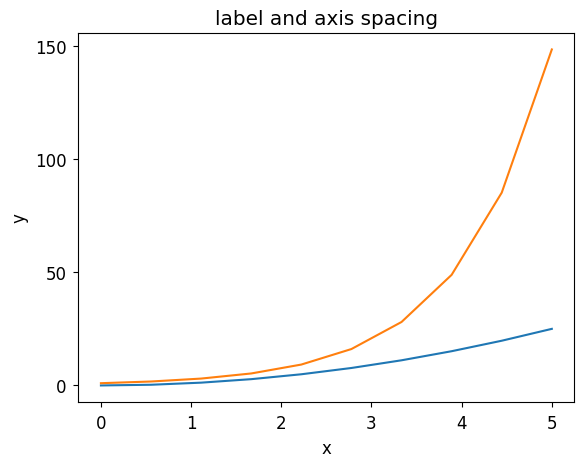

In [32]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

### Axis grid

With the grid method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the plot function:
    
    

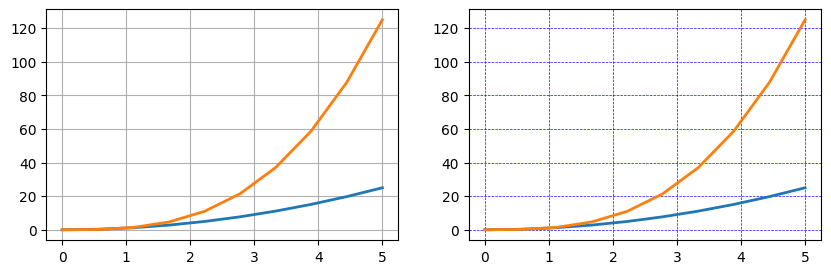

In [62]:

fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.95, linestyle='dashed', linewidth=0.5)


### Twin axes

In some cases it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:


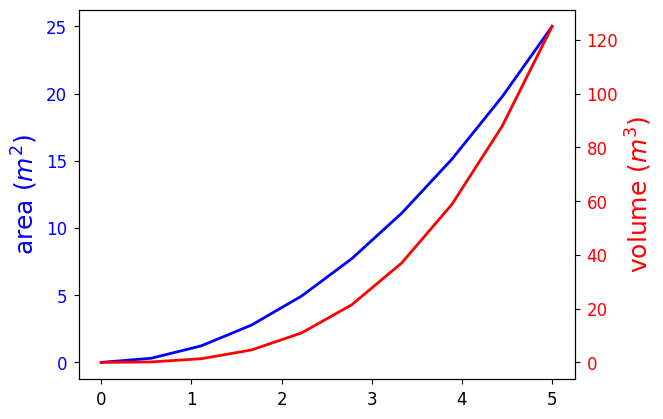

In [34]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:


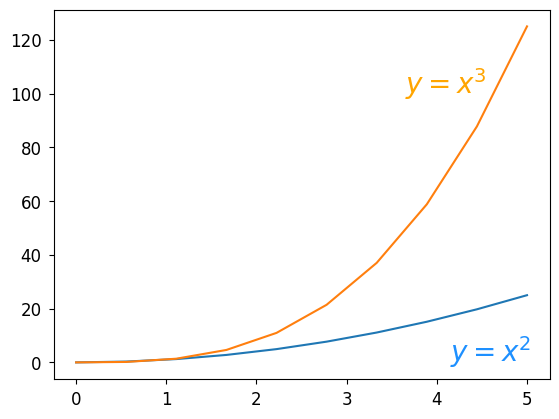

In [44]:
fig, ax = plt.subplots()

ax.plot(x, x**2, x, x**3)

ax.text(4.15, 0.2, r"$y=x^2$", fontsize=20, color="dodgerblue")
ax.text(3.65, 100, r"$y=x^3$", fontsize=20, color="orange");

## 4 Other 2D plot styles <a class="anchor" id="fourth-bullet"></a>
   
    
In addition to the regular plot method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:


Text(0.5, 1.0, 'fill_between')

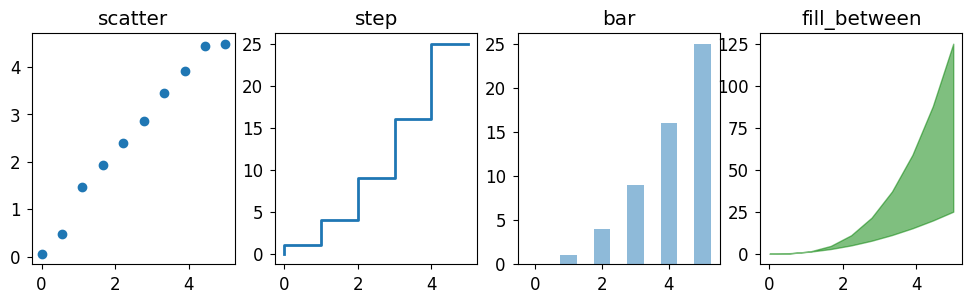

In [47]:
n = np.array([0,1,2,3,4,5])

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(x, x + 0.25*np.random.randn(len(x)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between")



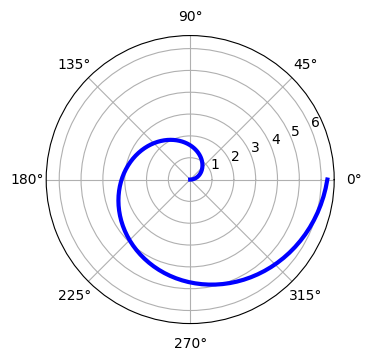

In [64]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True) #True
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

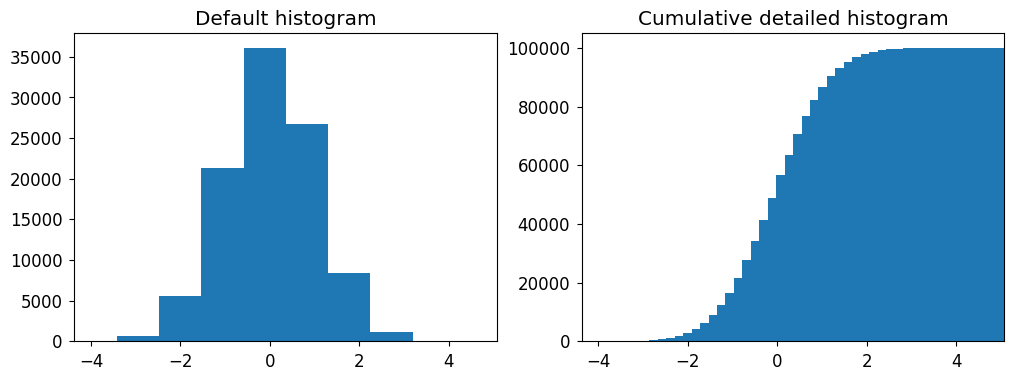

In [49]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

**Colormap and contour figures**

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps


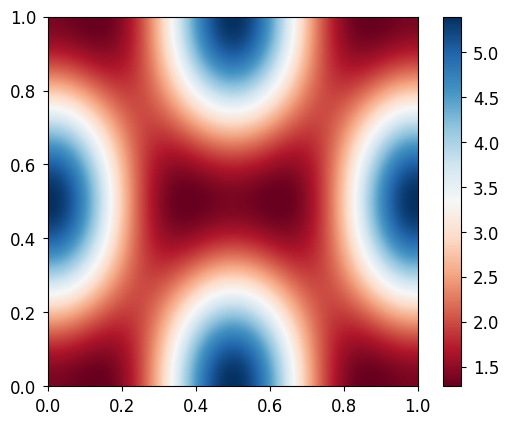

In [50]:

# colormap

alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

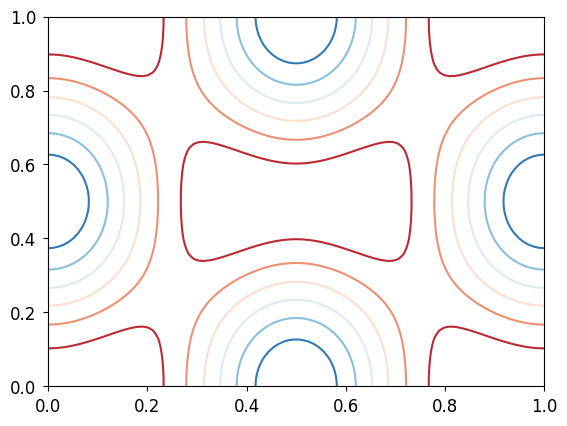

In [51]:
# contour

fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])



## 5 3D Plots <a class="anchor" id="fifth-bullet"></a>


To use 3D graphics in matplotlib, we first need to create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.


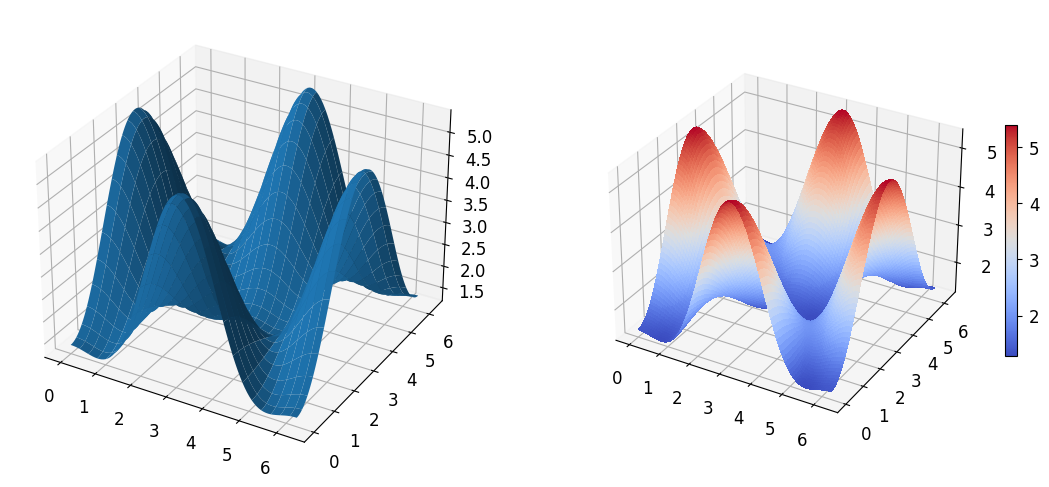

In [53]:

from mpl_toolkits.mplot3d.axes3d import Axes3D

# surface plots

fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)



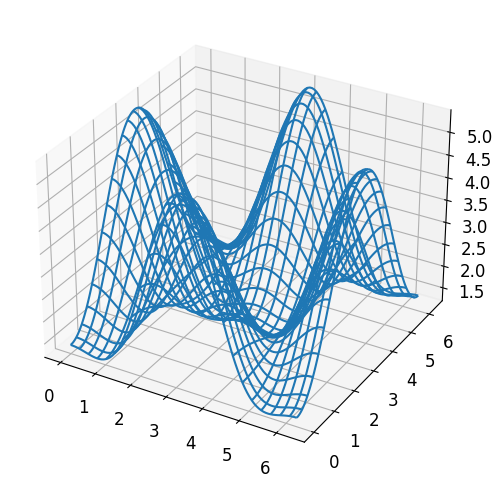

In [54]:
# wire-frame plot


fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

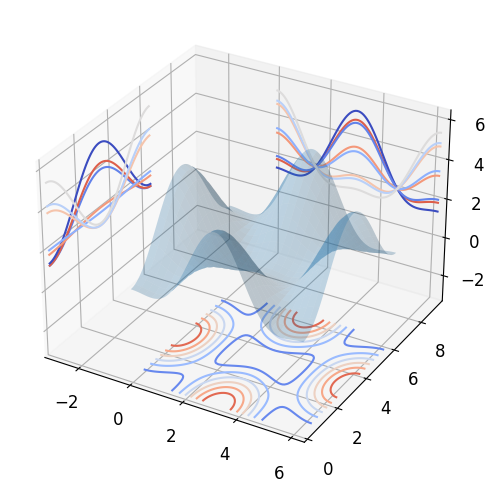

In [55]:
# coutour plots with projections

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);




We can change the perspective of a 3D plot using the `view_init` method, which takes two arguments: elevation and azimuth angle (in degrees):




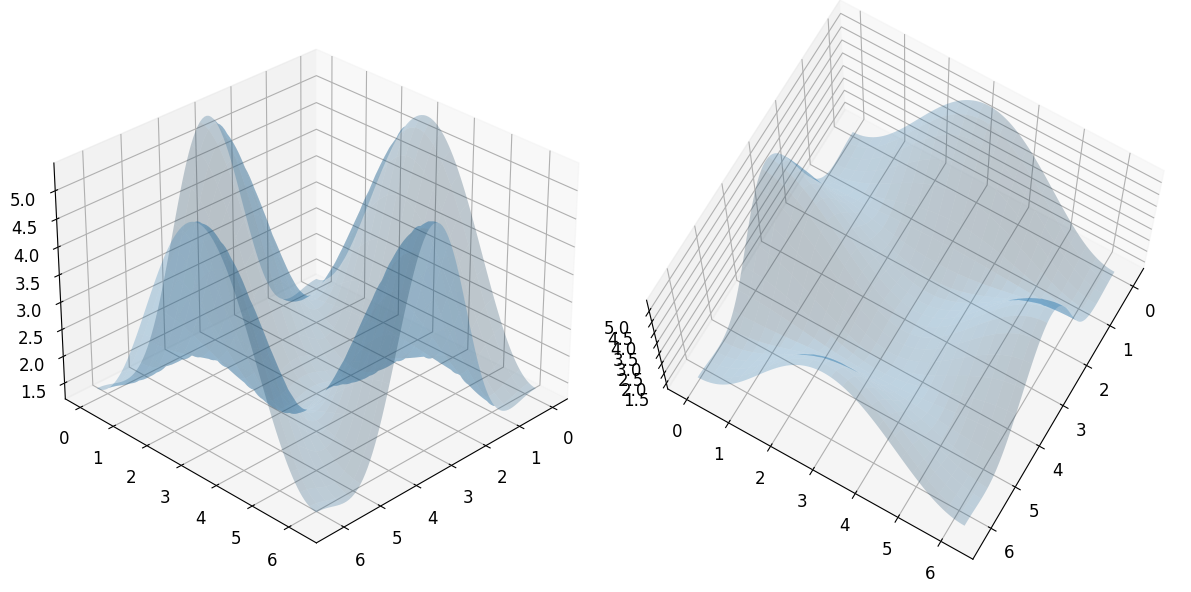

In [56]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()


## Summary <a class="anchor" id="nineth-bullet"></a>

In this lession, we have learnt how to make more advanced plots.

I would like to highlight that it is important to **separate computations and plotting**.

If you are doing calculations prior to plotting, and these take a while to get carried out, it is a good idea to separate the computational part of scripts from the plotting part (i.e. have a dedicated plotting script). You can use files to save the information from the computation routine, and then read this in to a plotting program. The advantage of doing this is that it is easier to tweak the plotting script without re-running the computation every time.



